# Statistical &  based Analysis 

By: Aakash Mittal

Dataset Name: Visa Dataset
Source: https://drive.google.com/file/d/1gnwyUzb2WpefonQZzsq1Q8BwjfV9QvJi/view?usp=sharing

a) describe, describe().T
b) mean, median, mode
c) 5 Number Summary
d) Box Plot
e)variance and standard deviation
f)correlation, covariance,skew
g)Normal Distribution
h)Lognormal Distribution
I)Pearson and Spearman Correlation

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Visadataset.csv')
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [4]:
df.describe()
#gives description/stats of numerical data

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [5]:
df.describe().T
#return transpose

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [6]:
#to describe for only obj columns not numerical columns
df[df.dtypes[df.dtypes=='object'].index].describe()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480,25480,25480,25480
unique,25480,6,4,2,2,5,4,2,2
top,EZYV01,Asia,Bachelor's,Y,N,Northeast,Year,Y,Certified
freq,1,16861,10234,14802,22525,7195,22962,22773,17018


Mean, Median, Mode

In [11]:
print(np.mean(df))

no_of_employees     5667.043210
yr_of_estab         1979.409929
prevailing_wage    74455.814592
dtype: float64


In [30]:
from scipy import stats
import statistics
print(np.median(df['no_of_employees']))

2109.0


In [40]:
print(statistics.mode(df['education_of_employee']))

Bachelor's


*************** finding outlier using "5 Number Summary" based on 'prevailing_wage' **************************

In [41]:
#find quartile_1(q1), quartile_3, where q1 & q3 are 25 and 75 percentile respectively
q1, q3 = np.percentile(df['prevailing_wage'],[25,75])
print(f"Value of q1 is: {q1}  and  value of q3 is: {q3}")

Value of q1 is: 34015.479999999996  and  value of q3 is: 107735.51250000001


In [42]:
# Inter Quartile Range
IQR = q3-q1
IQR

73720.03250000002

In [43]:
lower_fence = q1-1.5*(IQR)
upper_fence = q3+1.5*(IQR)
print(f"Value of Lower fence is: {lower_fence}  and  value of Upper fence is: {upper_fence}")

Value of Lower fence is: -76564.56875000002  and  value of Upper fence is: 218315.56125000003



It implies value below '-76564.56' and value above '-2844.53' are outliers.

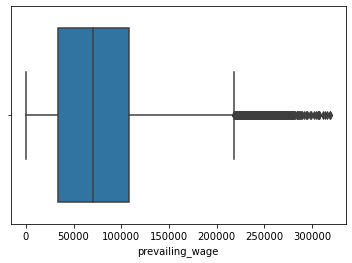

In [68]:
#Box Plot
import seaborn as sns
sns.boxplot(df['prevailing_wage'])

import warnings
warnings.filterwarnings("ignore")

#or we can calculate outliers through quantile

Quartiles (4-quantiles): Three quartiles split the data into four parts.
Deciles (10-quantiles): Nine deciles split the data into 10 parts.
Percentiles (100-quantiles): 99 percentiles split the data into 100 parts.

In [45]:
#10% of data 
df['prevailing_wage'].quantile(0.10)

3743.1470000000004

In [53]:
#75% of data
df['prevailing_wage'].quantile(0.75)
#or q3

107735.51250000001

In [47]:
#minimum value
df['prevailing_wage'].min()

2.1367

In [49]:
#maximum value
df['prevailing_wage'].max()

319210.27

In [50]:
df['prevailing_wage'].unique()

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

************* Measure of Dispersion: variance, covariance *******************************************

In [69]:
np.var(df)
#gives Population Variance

no_of_employees    5.233791e+08
yr_of_estab        1.794886e+03
prevailing_wage    2.789414e+09
dtype: float64

In [86]:
import statistics
statistics.variance(df['prevailing_wage'])
#gives Sample Variance

2789523763.8756495

In [87]:
#standard deviation
np.std(df['prevailing_wage'])

52814.90589711402

In [90]:
#standard deviation by using math lib
import math
math.sqrt(statistics.variance(df['prevailing_wage']))

52815.94232687371

"Covariance shows you how the two variables differ, whereas correlation shows you how the two variables are related"

In [91]:
#correlation
df.corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [92]:
#covariance
df.cov()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,5.233996e+08,-17224.155003,-1.150624e+07
yr_of_estab,-1.722416e+04,1794.956681,2.761653e+04
prevailing_wage,-1.150624e+07,27616.530171,2.789524e+09


In [11]:
import warnings
warnings.filterwarnings('ignore')

df.skew()
#negative sign shows left Skew

no_of_employees    12.265260
yr_of_estab        -2.037301
prevailing_wage     0.755776
dtype: float64

 Groupby operations

In [14]:
df.groupby('no_of_employees').mean()

,yr_of_estab,prevailing_wage
no_of_employees,,
-26,1979.428571,62422.835114
-25,1988.400000,91981.700000
-17,2000.500000,87902.482825
-14,1999.125000,24469.531363
-11,1991.111111,77284.718889
...,...,...
547172,1838.000000,22859.220000
579004,1969.000000,103507.010000
581468,1984.000000,41397.520000


In [15]:
df.groupby('no_of_employees').count()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
no_of_employees,,,,,,,,,,,
-26,7,7,7,7,7,7,7,7,7,7,7
-25,5,5,5,5,5,5,5,5,5,5,5
-17,4,4,4,4,4,4,4,4,4,4,4
-14,8,8,8,8,8,8,8,8,8,8,8
-11,9,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...
547172,1,1,1,1,1,1,1,1,1,1,1
579004,1,1,1,1,1,1,1,1,1,1,1
581468,1,1,1,1,1,1,1,1,1,1,1


In [17]:
df[df['no_of_employees']<1000]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied
19,EZYV20,Asia,Doctorate,N,N,843,1972,Midwest,79948.12,Year,Y,Certified
20,EZYV21,Asia,Master's,N,N,880,2008,West,71128.98,Year,Y,Denied
24,EZYV25,Europe,Doctorate,Y,N,241,1981,Midwest,71286.04,Year,Y,Certified
26,EZYV27,Asia,Bachelor's,Y,N,756,1995,South,86332.95,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25452,EZYV25453,Asia,High School,N,N,70,1995,Northeast,84833.89,Year,Y,Denied
25456,EZYV25457,Asia,Bachelor's,Y,N,998,1996,South,67340.65,Year,Y,Certified
25460,EZYV25461,Europe,Master's,Y,Y,413,1997,West,8263.47,Year,Y,Certified
25463,EZYV25464,Asia,High School,N,N,444,1838,Midwest,213189.36,Year,Y,Certified


 ***************** Histogram ***********************

<AxesSubplot:xlabel='prevailing_wage', ylabel='Count'>

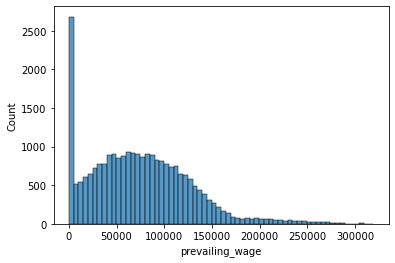

In [95]:
sns.histplot(df['prevailing_wage'])
#right-skew (with all positive outliers )

<AxesSubplot:xlabel='prevailing_wage', ylabel='Density'>

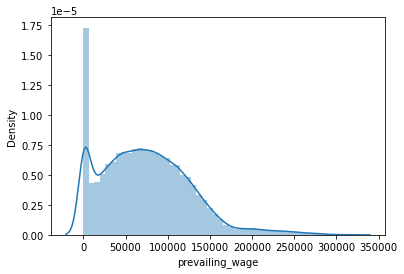

In [101]:
import seaborn as sns
sns.distplot(df['prevailing_wage'])

<AxesSubplot:xlabel='prevailing_wage', ylabel='Count'>

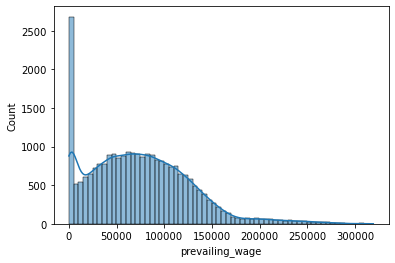

In [103]:
sns.histplot(df['prevailing_wage'], kde = True) 
# by using kde: Kernel density estimator

******************************** Normai Distribution / Gaussian Distribution ********************************************

In [26]:
#return only numerical columns in list format
num_col = [feature for feature in df.columns if df[feature].dtypes != 'object']
num_col
# we can place '0' also in place of object

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [27]:
df[num_col]

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900
...,...,...,...
25475,2601,2008,77092.5700
25476,3274,2006,279174.7900
25477,1121,1910,146298.8500
25478,1918,1887,86154.7700


In [30]:
from scipy.stats import normaltest
import seaborn as sns

In [36]:
#bring out p-value
normaltest(df['prevailing_wage'])

NormaltestResult(statistic=2315.646633847051, pvalue=0.0)

In [37]:
#bring out p-value
normaltest(df['prevailing_wage'])[1]

# if p-value>0.5 -> 'Normally distributed'
# if p-value<0.5 -> 'Not Normally distributed'

0.0

<AxesSubplot:xlabel='prevailing_wage', ylabel='Density'>

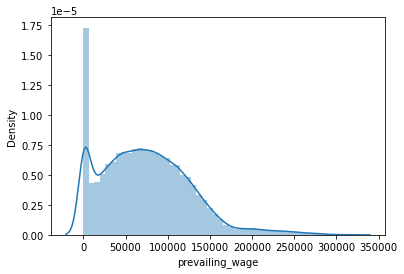

In [39]:
sns.distplot(df['prevailing_wage'])

In [ ]:
#Another example of Normal distribution

In [123]:
nd = np.random.normal(0.4, 0.5, 1000)  #np.random.normal(loc=0.0, scale=1.0, size=None)

In [116]:
nd

array([ 1.10112706,  0.51839377,  1.16664921,  0.8043974 ,  1.23916954,
        0.69798763,  0.89192927,  1.02279937,  0.39801573,  1.24093292,
        1.14557895,  1.0135798 ,  0.96001106,  0.58059604,  0.68480482,
        0.80368738,  1.01665774,  0.82031618,  0.83509495,  1.32305841,
        1.09678937,  0.31392109,  0.43905201,  0.7873513 ,  1.15442152,
        0.65628589,  1.22855037,  0.66817243,  0.94920492,  0.45032661,
        0.78455082,  1.58986101,  0.90863455,  1.35494642,  1.12892262,
        0.80305609,  1.14363019,  0.61086702,  0.55394337,  1.86089016,
        0.70932311,  0.71671376,  1.49249322,  0.60230217,  1.00405105,
        1.26832191,  0.31513316,  0.77659202,  0.33656014,  1.04290703,
        0.36424334,  1.6432922 ,  1.52052143,  1.2384976 ,  0.4975602 ,
        0.88879907,  1.12370357,  0.97210797,  0.69910846,  1.10565348,
        0.39700219,  1.52108174,  0.61474296,  0.84733751,  0.44421333,
        0.50428341,  1.89107075,  0.31898373,  0.4044159 ,  0.81

<AxesSubplot:ylabel='Count'>

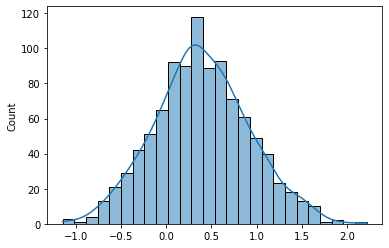

In [124]:
sns.histplot(nd, kde = True)

************************** Log Normal Distribution *********************************

In [135]:
nd = np.random.lognormal(5, 1, 100) #np.random.lognormal(mean(mu), sigma, size)

<AxesSubplot:ylabel='Count'>

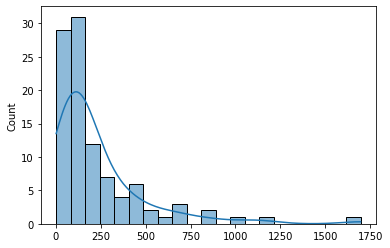

In [136]:
sns.histplot(nd, kde = True)
#lognormal distribution

********** converting Lognormal distribution into Normal distribution by using Log **********************

<AxesSubplot:ylabel='Count'>

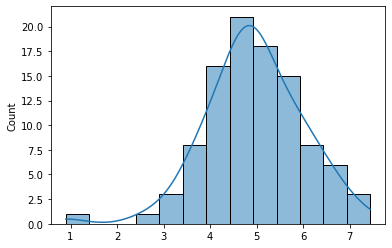

In [137]:
sns.histplot(np.log(nd), kde = True)

************************* Pearson and Spearman Correlation ****************************************

In [141]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Pearson and Spearman Correlation graphically represented by 'Pairplot'

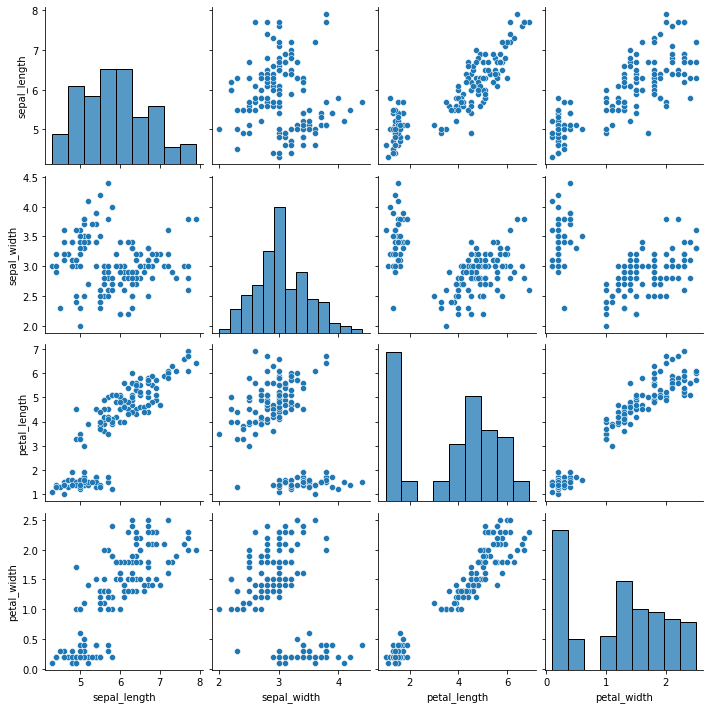

In [143]:
sns.pairplot(iris_df) #data must be from pandas dataframe

--------------------------------------xxxxxxxxxxxxxxxxxxxxxxxxxx---------------------------------------------------